In [43]:
import numpy as np
from spacepy import pycdf
from matplotlib import pyplot as plt

# Load and explore data for space crafts
with pycdf.CDF("../data/C1_CP_FGM_SPIN__20010705_000001_20010705_235959_V141122.cdf") as cdf:
    print(cdf.keys(), "\n")
    print(cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")

    B_C1 = cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"][:] # nT
    time_tags_C1 = cdf["time_tags__C1_CP_FGM_SPIN"][:]

with pycdf.CDF("../data/C2_CP_FGM_SPIN__20010705_000001_20010705_235959_V140305.cdf") as cdf:
    #print(cdf.keys(), "\n")
    #print(cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")

    B_C2 = cdf["B_vec_xyz_gse__C2_CP_FGM_SPIN"][:] # nT
    time_tags_C2 = cdf["time_tags__C2_CP_FGM_SPIN"][:]

with pycdf.CDF("../data/C3_CP_FGM_SPIN__20010705_000001_20010705_235959_V140305.cdf") as cdf:
    #print(cdf.keys(), "\n")
    #print(cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")

    B_C3 = cdf["B_vec_xyz_gse__C3_CP_FGM_SPIN"][:] # nT
    time_tags_C3 = cdf["time_tags__C3_CP_FGM_SPIN"][:]    

with pycdf.CDF("../data/C4_CP_FGM_SPIN__20010705_000001_20010705_235959_V140305.cdf") as cdf:
    #print(cdf.keys(), "\n")
    #print(cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")

    B_C4 = cdf["B_vec_xyz_gse__C4_CP_FGM_SPIN"][:] # nT
    time_tags_C4 = cdf["time_tags__C4_CP_FGM_SPIN"][:]    

KeysView(<CDF:
B_mag__C1_CP_FGM_SPIN: CDF_FLOAT [18617]
B_vec_xyz_gse__C1_CP_FGM_SPIN: CDF_FLOAT [18617, 3]
B_vec_xyz_gse__C1_CP_FGM_SPIN_LABEL_1: CDF_CHAR*2 [3] NRV
B_vec_xyz_gse__C1_CP_FGM_SPIN_REPRESENTATION_1: CDF_CHAR*1 [3] NRV
half_interval__C1_CP_FGM_SPIN: CDF_FLOAT [18617]
range__C1_CP_FGM_SPIN: CDF_INT4 [18617]
sc_pos_xyz_gse__C1_CP_FGM_SPIN: CDF_FLOAT [18617, 3]
sc_pos_xyz_gse__C1_CP_FGM_SPIN_LABEL_1: CDF_CHAR*1 [3] NRV
sc_pos_xyz_gse__C1_CP_FGM_SPIN_REPRESENTATION_1: CDF_CHAR*1 [3] NRV
time_tags__C1_CP_FGM_SPIN: CDF_EPOCH [18617]
tm__C1_CP_FGM_SPIN: CDF_INT4 [18617]
>) 

CATDESC: Magnetic Field Vector, spin resolution in GSE [CDF_CHAR]
COORDINATE_SYSTEM: GSE>Geocentric Solar Ecliptic [CDF_CHAR]
DEPEND_0: time_tags__C1_CP_FGM_SPIN [CDF_CHAR]
ENTITY: Magnetic_Field [CDF_CHAR]
FIELDNAM: Magnetic Field Vector, spin resolution in GSE [CDF_CHAR]
FILLVAL: -1e+30 [CDF_FLOAT]
FLUCTUATIONS: Waveform [CDF_CHAR]
LABEL_1: B_vec_xyz_gse__C1_CP_FGM_SPIN_LABEL_1 [CDF_CHAR]
LABLAXIS: Mag Fie

In [44]:
import datetime
startTime = datetime.datetime(2001,7,5,6,10,0)
endTime = datetime.datetime(2001,7,5,6,40,0)

# Convert to numpy array
t_C1 = np.array(time_tags_C1)
t_C2 = np.array(time_tags_C2)
t_C3 = np.array(time_tags_C3)
t_C4 = np.array(time_tags_C4)


# Calculate differences from target time
diffsEnd_C1 = np.abs(t_C1-endTime)
diffsStart_C1 = np.abs(t_C1-startTime)
diffsEnd_C2 = np.abs(t_C2-endTime)
diffsStart_C2 = np.abs(t_C2-startTime)
diffsEnd_C3 = np.abs(t_C3-endTime)
diffsStart_C3 = np.abs(t_C3-startTime)
diffsEnd_C4 = np.abs(t_C4-endTime)
diffsStart_C4 = np.abs(t_C4-startTime)
# Find index of target time
endTimeIdx_C1 = np.argmin(diffsEnd_C1)
startTimeIdx_C1 = np.argmin(diffsStart_C1)
endTimeIdx_C2 = np.argmin(diffsEnd_C2)
startTimeIdx_C2 = np.argmin(diffsStart_C2)
endTimeIdx_C3 = np.argmin(diffsEnd_C3)
startTimeIdx_C3 = np.argmin(diffsStart_C3)
endTimeIdx_C4 = np.argmin(diffsEnd_C4)
startTimeIdx_C4 = np.argmin(diffsStart_C4)

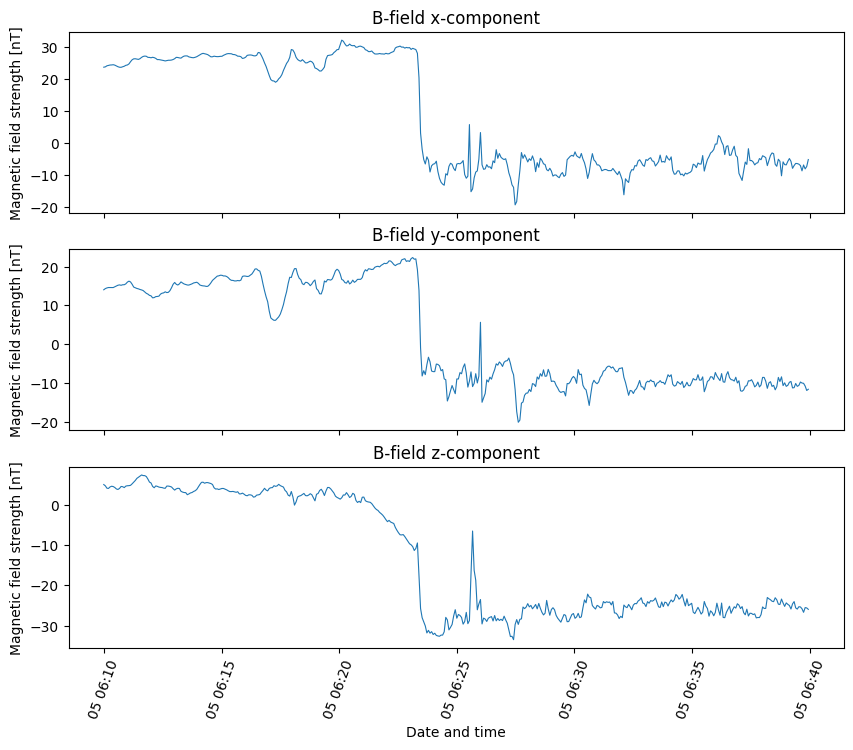

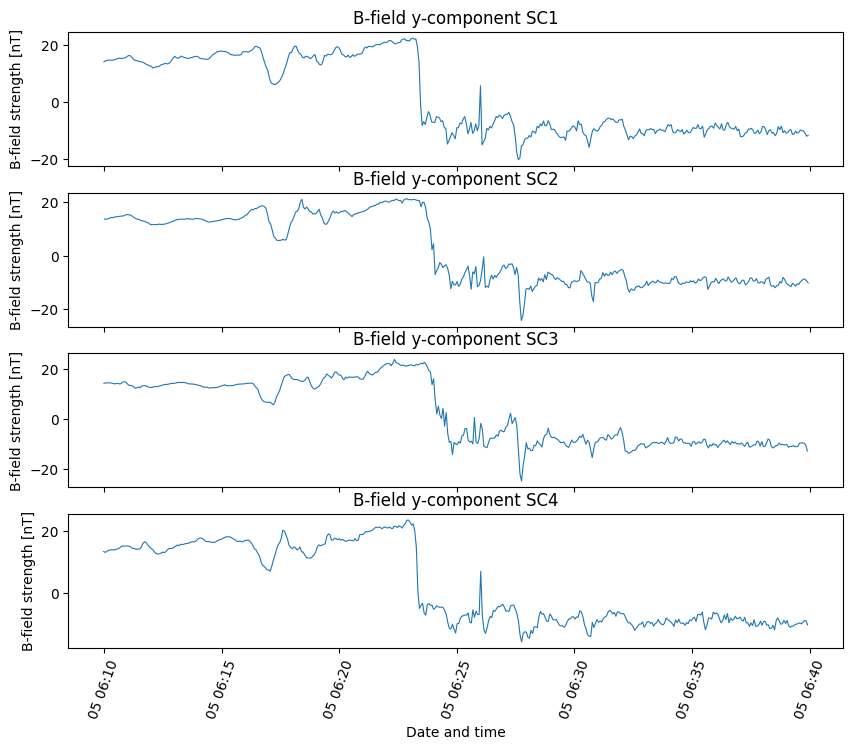

In [45]:
## Visualize ##

# B-field components for space craft 1 16:10 -> 16:40

fig, axs = plt.subplots(3,1, sharex=True, figsize=(10,8))

axs[0].plot(time_tags_C1[startTimeIdx_C1:endTimeIdx_C1],B_C1[startTimeIdx_C1:endTimeIdx_C1,0], lw=0.8)
axs[0].set_ylabel("Magnetic field strength [nT]")
axs[0].set_title("B-field x-component")

axs[1].plot(time_tags_C1[startTimeIdx_C1:endTimeIdx_C1],B_C1[startTimeIdx_C1:endTimeIdx_C1,1], lw=0.8)
axs[1].set_ylabel("Magnetic field strength [nT]")
axs[1].set_title("B-field y-component")

axs[2].plot(time_tags_C1[startTimeIdx_C1:endTimeIdx_C1],B_C1[startTimeIdx_C1:endTimeIdx_C1,2], lw=0.8)
axs[2].set_ylabel("Magnetic field strength [nT]")
axs[2].set_title("B-field z-component")
axs[2].set_xlabel("Date and time")
axs[2].tick_params(axis='x', rotation=70)


# B-field component from all space craft 16:10 -> 16:40 

component = "y"

if component=="x":
    comp=0
elif component=="y":
    comp=1
elif component=="z":
    comp=2



fig, axs = plt.subplots(4,1, sharex=True, figsize=(10,8))

axs[0].plot(time_tags_C1[startTimeIdx_C1:endTimeIdx_C1],B_C1[startTimeIdx_C1:endTimeIdx_C1,comp], lw=0.8)
axs[0].set_ylabel("B-field strength [nT]")
axs[0].set_title(f"B-field {component}-component SC1")

axs[1].plot(time_tags_C2[startTimeIdx_C2:endTimeIdx_C2],B_C2[startTimeIdx_C2:endTimeIdx_C2,comp], lw=0.8)
axs[1].set_ylabel("B-field strength [nT]")
axs[1].set_title(f"B-field {component}-component SC2")

axs[2].plot(time_tags_C3[startTimeIdx_C3:endTimeIdx_C3],B_C3[startTimeIdx_C3:endTimeIdx_C3,comp], lw=0.8)
axs[2].set_ylabel("B-field strength [nT]")
axs[2].set_title(f"B-field {component}-component SC3")

axs[3].plot(time_tags_C4[startTimeIdx_C4:endTimeIdx_C4],B_C4[startTimeIdx_C4:endTimeIdx_C4,comp], lw=0.8)
axs[3].set_ylabel("B-field strength [nT]")
axs[3].set_title(f"B-field {component}-component SC4")
axs[3].set_xlabel("Date and time")
axs[3].tick_params(axis='x', rotation=70)

In [ ]:
## Orientation of current sheet. ##

def findIdx(targetTime,time_tags):
    t = np.array(time_tags)
    diffs = np.abs(t-targetTime)
    return np.argmin(diffs)

averagingLength = 10
beforeTime = datetime.datetime(2001,7,5,6,22,30)
afterTime = datetime.datetime(2001,7,5,6,24,30)
beforeIdx = findIdx(beforeTime,t_C1)
afterIdx = findIdx(afterTime,t_C1)

avg_before_C1 = np.sum(B_C1[beforeIdx-averagingLength:beforeIdx],axis=0)/averagingLength
avg_after_C1 = np.sum(B_C1[afterIdx:afterIdx+averagingLength],axis=0)/averagingLength

sheet_normal = np.cross(avg_before_C1,avg_after_C1)
sheet_normal = sheet_normal/np.linalg.norm(sheet_normal)
print(sheet_normal)


[28.5595 20.8557 -4.2792]
[ -7.5176   -10.966799 -28.4306  ]
[-0.59760135  0.7883721  -0.14608876]
